## Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
## Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
## Data Description
The data contains the different attributes of used/refurbished phones and tablets. The detailed data dictionary is given below.

**Data Dictionary**

- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- new_price: Price of a new device of the same model in euros
- used_price: Price of the used/refurbished device in euros

## Importing necessary libraries and data

In [274]:
# this will help in making the Python code more structured automatically 
#%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
import statsmodels.api as sm

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [275]:
# loading the dataset
data = pd.read_csv("..data/ReCell_used_device_data.csv")

In [276]:
# Let's make sure data was loaded correctly
data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,111.62,74.26
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,249.39,174.53
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,359.47,165.85
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,278.93,169.93
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,140.87,80.64


## Data Overview

- Observations
- Sanity checks

In [277]:
# Let's view a random sample from the data. Setting the random_state to 2 to ensure we get the same results every time
data.sample(10, random_state=2)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
1207,HTC,Android,12.70,no,no,8.0,5.0,32.0,4.0,2100.0,160.00,2014,1044,190.05,70.70
143,Samsung,Android,20.32,yes,no,5.0,2.0,16.0,1.5,4200.0,313.00,2015,909,210.23,75.65
3202,Huawei,Android,16.69,yes,yes,10.5,16.0,128.0,8.0,4000.0,178.00,2020,221,469.87,128.57
1127,Honor,Android,10.29,no,no,8.0,2.0,32.0,4.0,1730.0,159.00,2015,894,69.98,48.57
2926,Xiaomi,Android,14.83,yes,no,13.0,8.0,64.0,4.0,3000.0,150.00,2018,446,169.30,105.80
1726,LG,Android,7.67,no,no,2.0,1.3,16.0,4.0,1540.0,140.45,2014,952,61.35,29.49
62,Infinix,Android,15.39,yes,no,NaN,16.0,32.0,3.0,4000.0,178.00,2019,316,99.70,95.13
3273,Sony,Android,15.37,yes,yes,NaN,8.0,256.0,8.0,4000.0,181.40,2020,236,934.15,240.67
1411,Others,Others,19.94,no,no,5.0,2.0,32.0,4.0,4450.0,384.00,2014,767,170.81,78.89
551,Alcatel,Android,10.29,no,no,5.0,0.3,16.0,4.0,1800.0,157.00,2013,921,99.85,51.29


In [278]:
#Create a duplicate of the dataframe so that the original data remains unchanged
df = data.copy()
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,111.62,74.26
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,249.39,174.53
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,359.47,165.85
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,278.93,169.93
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,140.87,80.64


In [279]:
#Checking the shape of the data, column datatypes and number of non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand_name        3454 non-null   object 
 1   os                3454 non-null   object 
 2   screen_size       3454 non-null   float64
 3   4g                3454 non-null   object 
 4   5g                3454 non-null   object 
 5   main_camera_mp    3275 non-null   float64
 6   selfie_camera_mp  3452 non-null   float64
 7   int_memory        3450 non-null   float64
 8   ram               3450 non-null   float64
 9   battery           3448 non-null   float64
 10  weight            3447 non-null   float64
 11  release_year      3454 non-null   int64  
 12  days_used         3454 non-null   int64  
 13  new_price         3454 non-null   float64
 14  used_price        3454 non-null   float64
dtypes: float64(9), int64(2), object(4)
memory usage: 404.9+ KB


#### Observation
* There are 15 columns and 3454 rows in the dataset
* Scanning through all the columns, initial thought is that, we would be able to derive value from all the columns. We will explore possible correlation between different columns further into the analysis 
* There are 4 object type columns (brand_name, os, 4g, 5g) and 11 numeric columns in the initial data 
* main_camera_mp, selfie_camera_mp, int_memory, ram, battery, weight are the columns with null value. No other columns has null
* Both new_price and used_price columns are numeric. So there should be no units in the data for us to clean
* Some of the numeric columns could be more useful in categorical form. We will explore this option further into the analysis

In [280]:
# coverting "objects" to "category" reduces the data space required to store the dataframe
# As good practice let's convert the object type columns to categorical columns
df = df.astype({'brand_name':'category','os':'category','4g':'category','5g':'category'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   brand_name        3454 non-null   category
 1   os                3454 non-null   category
 2   screen_size       3454 non-null   float64 
 3   4g                3454 non-null   category
 4   5g                3454 non-null   category
 5   main_camera_mp    3275 non-null   float64 
 6   selfie_camera_mp  3452 non-null   float64 
 7   int_memory        3450 non-null   float64 
 8   ram               3450 non-null   float64 
 9   battery           3448 non-null   float64 
 10  weight            3447 non-null   float64 
 11  release_year      3454 non-null   int64   
 12  days_used         3454 non-null   int64   
 13  new_price         3454 non-null   float64 
 14  used_price        3454 non-null   float64 
dtypes: category(4), float64(9), int64(2)
memory usage: 312.2 KB


In [281]:
# checking for missing values for each column
df.isnull().sum().sort_values(ascending=False)

main_camera_mp      179
weight                7
battery               6
int_memory            4
ram                   4
selfie_camera_mp      2
brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
release_year          0
days_used             0
new_price             0
used_price            0
dtype: int64

#### Observation
* There are very few records with missing values
* main_camera_mp has the most number of missing values followed by weight, battery, int_memory, ram and selfie_camera_mp

In [282]:
# checking for duplicate values
df.duplicated().sum()

0

#### Observation
* The dataset has no duplicate rows

In [283]:
# Get the total number of unique values for each column
df.nunique()

brand_name            34
os                     4
screen_size          142
4g                     2
5g                     2
main_camera_mp        41
selfie_camera_mp      37
int_memory            15
ram                   12
battery              324
weight               555
release_year           8
days_used            924
new_price           2988
used_price          3094
dtype: int64

#### Observation
* There are not many unique values in the camera mp, ram and internal memory fields. We could consider transforming them into categorical variables

In [284]:
#Let's check the summary statictics of the continouq variables
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275.0,NaN,NaN,NaN,9.460208,4.815461,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3452.0,NaN,NaN,NaN,6.554229,6.970372,0.0,2.0,5.0,8.0,32.0
int_memory,3450.0,NaN,NaN,NaN,54.573099,84.972371,0.01,16.0,32.0,64.0,1024.0
ram,3450.0,NaN,NaN,NaN,4.036122,1.365105,0.02,4.0,4.0,4.0,12.0
battery,3448.0,NaN,NaN,NaN,3133.402697,1299.682844,500.0,2100.0,3000.0,4000.0,9720.0


### Observation
* We have data for 33 different brands of phones/tablets available in the dataset. In addition to the 33 brands named, we have more than 500 records with brand marked as others
* There are 4 different OS types in the data with Android being the OS for majority of the devices
* 4g and 5g columns have yes and no values
* The oldest year of release in the data is 2013 and earliest is 2020
* The Average weight of the used phones is 182.75
* Minimum used_price is 4.56, which is above 0. Maximum used_price is 749.52. So no cleaning would be necessary and we can do log transformation if needed
* Minimum new_price is 18.2, which is above 0. Maximum new_price is 2560.2. So no cleaning would be necessary and we can do log transformation if needed
* Minimum days_used is 91.0, which is above 0. Maximum days_used is 1094.0. So no cleaning would be necessary and we can do log transformation if needed


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. Budget devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of budget devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the price of a used device?

## Univariate Analysis

#### Define the function we will be using to plot distribution for our analysis

In [285]:
# Function to create labeled distribution plots

def boxplot_histogram(data,feature,figsize=(12,7),kde=False,hue=None,element='bars',bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    hue: Variable that is mapped to determine the color of plot elements
    element:Visual representation of the histogram statistic. Default is bar.
    bins: number of bins for histogram (default None)
    """
    #Set plot settings
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,)  
    # Creating Boxplot
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color='hotpink')  
    # Creating histplot
    if bins:
        sns.histplot(data=data, x=feature, kde=kde,hue=hue,element=element, ax=ax_hist2,bins=bins,color='Indigo')
    else:
        sns.histplot(data=data, x=feature, kde=kde,hue=hue,element=element, ax=ax_hist2,color='Indigo')        
    # Show mean and median in histogram
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--")     
    ax_hist2.axvline(data[feature].median(), color="red", linestyle="-")

### We will now plot the distribution of each continous variable

#### `used_price`

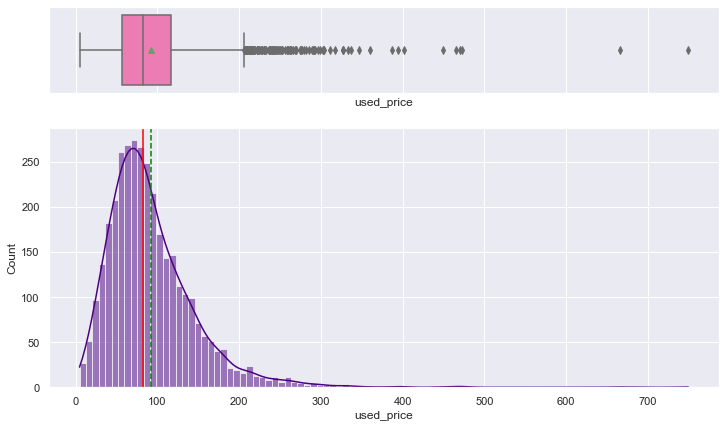

In [286]:
#Plot distribution of the used price
boxplot_histogram(df,'used_price',kde=True)

#### Observation
* Our target vriable is slightly left skewed with more data falling below the mean 

In [287]:
#Do a log transformation of the used price column to deal with the skewness 
df['used_price_log'] = np.log(df['used_price'])

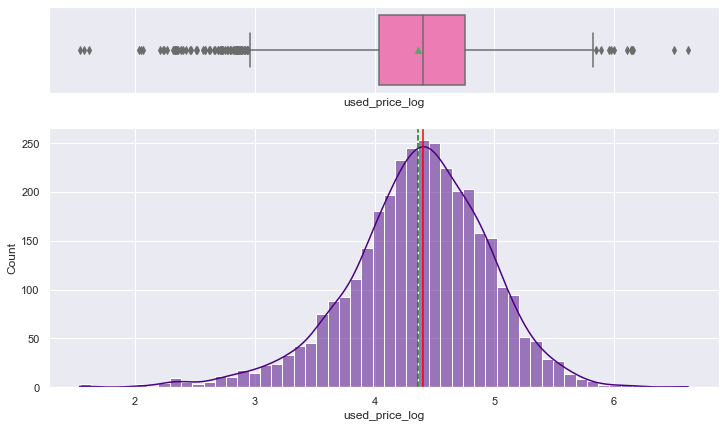

In [288]:
#Plot distribution of the used price log
boxplot_histogram(df,'used_price_log',kde=True)

#### Observation
* Log of the data gives us a more normal distribution
* Transformed data still has some outliers

#### `new_price`

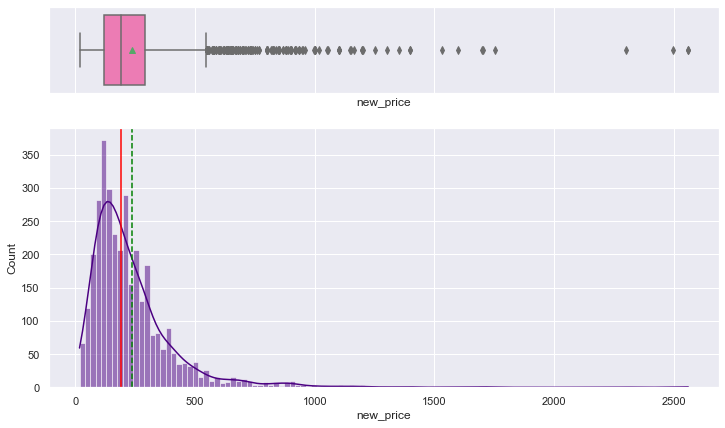

In [289]:
#Plot distribution of the new_price
boxplot_histogram(df,'new_price',kde=True)

#### Observation
* new_price vriable is slightly left skewed with more data falling below the mean 

In [290]:
#Do a log transformation of the new price column to deal with the skewness 
df['new_price_log'] = np.log(df['new_price'])

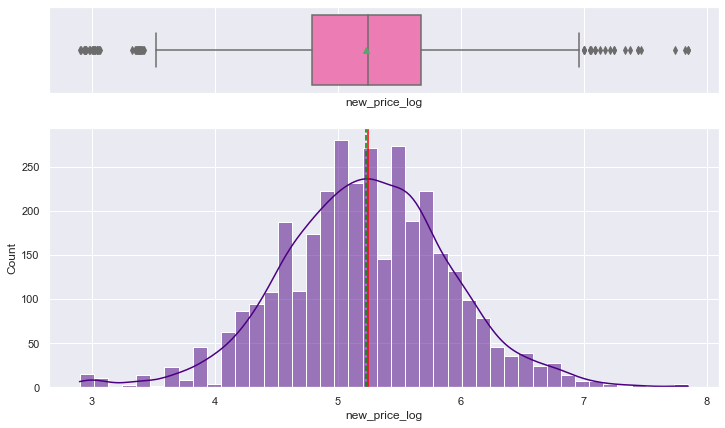

In [291]:
#Plot distribution of the used price log
boxplot_histogram(df,'new_price_log',kde=True)

#### Observation
* The log transformation provides us with data that is more normally distributed
* Transformed data still has some outliers

#### `days_used`

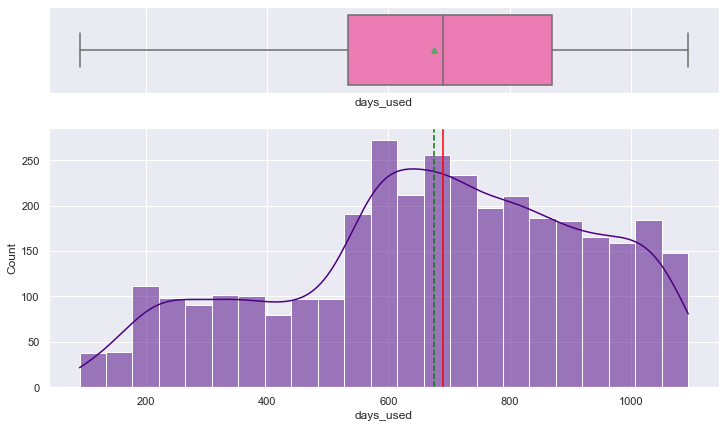

In [292]:
#Plot distribution of the days_used
boxplot_histogram(df,'days_used',kde=True)

In [145]:
df['days_used_log'] = np.log(df['days_used'])

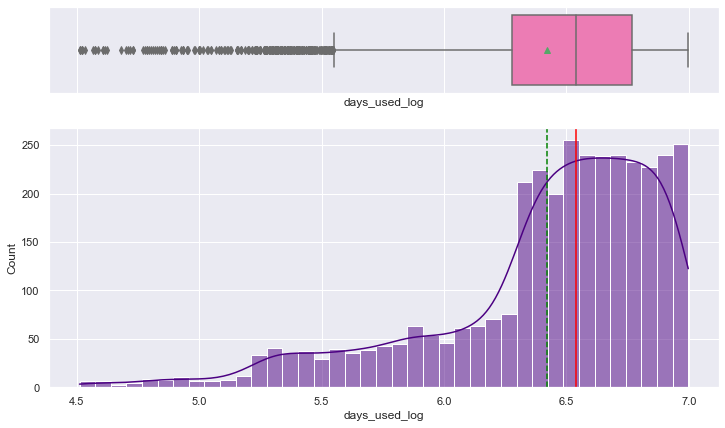

In [146]:
#Plot distribution of the used price log
boxplot_histogram(df,'days_used_log',kde=True)

#### Observation
* Log transformation doesn't have any significant effect on it. So we will drop the log column

In [147]:
#Drop the days used column
df.drop('days_used_log',inplace=True,axis=1)

#### `screen_size`

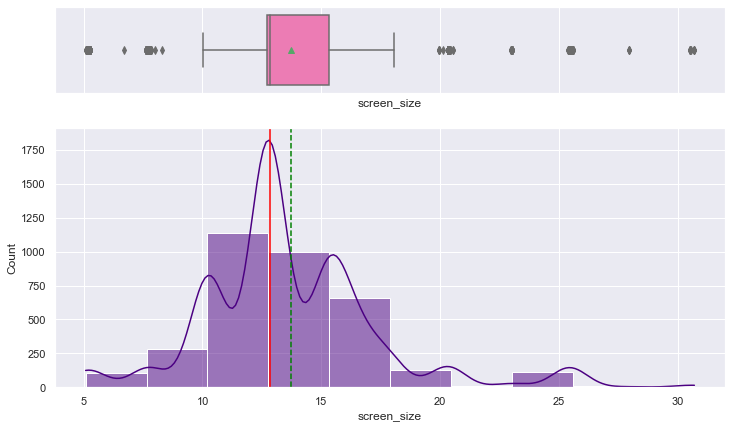

In [148]:
#Plot distribution of 
boxplot_histogram(data,'screen_size',kde=True,bins=10)

#### Observation
* Majority of the devices have screen size between 10 to 15 

#### `main_camera_mp`

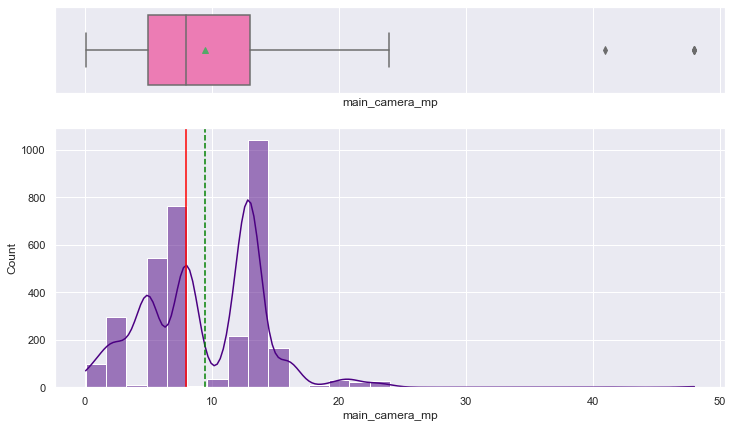

In [149]:
#Plot distribution of main_camera_mp
boxplot_histogram(data,'main_camera_mp',kde=True,bins = 30)

#### Observation
* The distribution is left skewed

#### `selfie_camera_mp`

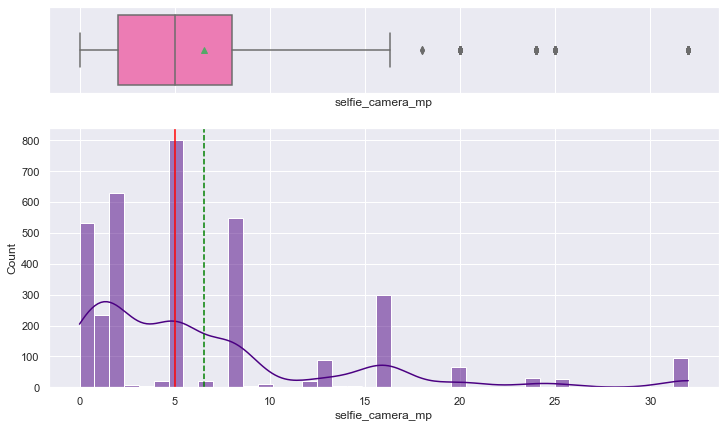

In [150]:
#Plot distribution of selfie_camera_mp
boxplot_histogram(data,'selfie_camera_mp',kde=True)

#### Observation
* The distribution is right skewed with majority of the selfie camera being on the lower end

#### `int_memory`

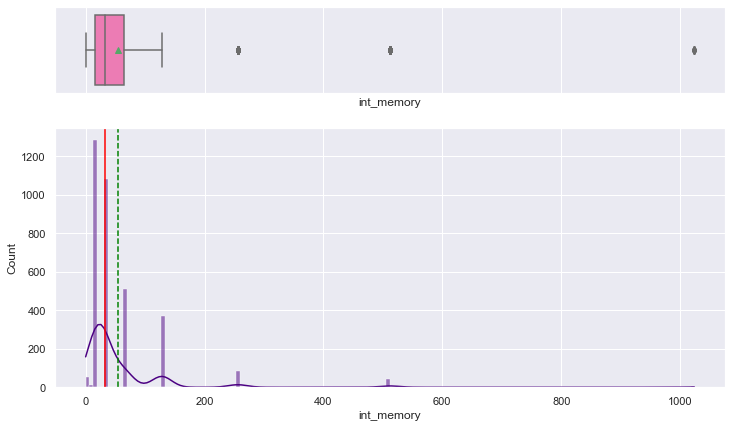

In [151]:
#Plot distribution of int_memory
boxplot_histogram(data,'int_memory',kde=True)

#### Observation
* The distribution is right skewed 

#### `ram`

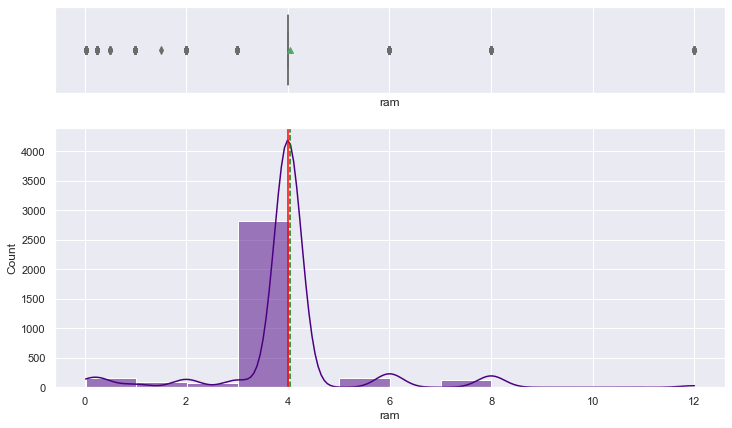

In [152]:
#Plot distribution of ram
boxplot_histogram(data,'ram',kde=True,bins=12)

#### Observation
* Data is normally distributed with majority of the devices having a ram of 4

#### `battery`

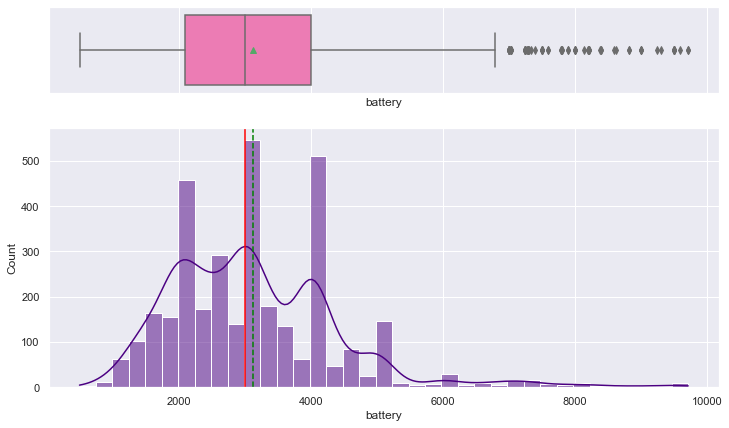

In [153]:
#Plot distribution of ram
boxplot_histogram(data,'battery',kde=True)

#### Observation
* Data has outliers on the right indicating only a few devices come with high powered battery

#### `weight`

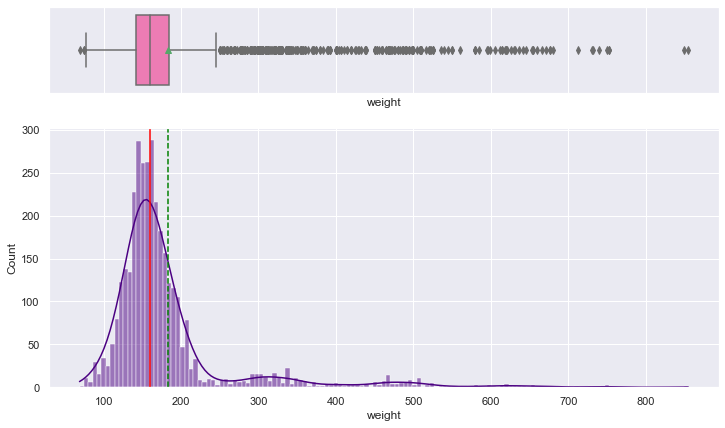

In [154]:
#Plot distribution of ram
boxplot_histogram(data,'weight',kde=True)

#### Observation
* Data has outliers on the right indicating most we have more data for phone than tablets/heavier devices

### We will now generate bar plot for the categorical variables

In [155]:
# function to create labeled barplots


def labeled_barplot(data, feature, show_percent=False, top_n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    show_percent: whether to display percentages instead of count (default is False)
    top_n: displays the top n category levels (default is None, i.e., display all levels)
    """
    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if top_n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(top_n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(data=data,x=feature,palette="Paired",order=data[feature].value_counts().index[:top_n].sort_values(),)

    for p in ax.patches:
        if show_percent == True:
            label = "{:.1f}%".format(100 * p.get_height() / total)  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category
        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(label,(x, y),ha="center",va="center",size=12,xytext=(0, 5),textcoords="offset points",)  # annotate the percentage

    plt.show()  # show the plot

#### `brand_name`

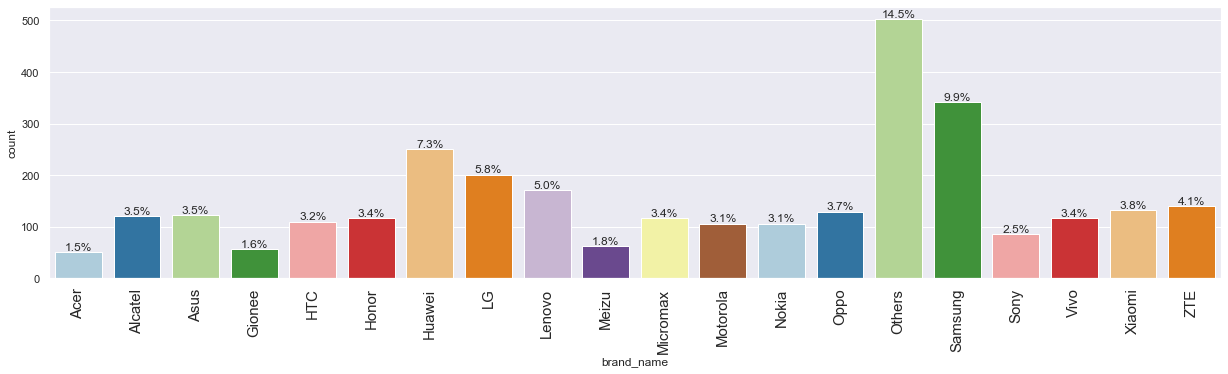

In [156]:
# Let's generate a bar plot for the top 20 brands
labeled_barplot(df, 'brand_name', show_percent=True, top_n=20)

#### Observation
* Samsung brand appears the most in the data with 9.9% of the data being samsung device followed by Huawei and LG


#### `os`

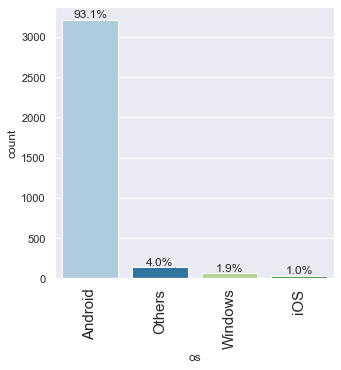

In [30]:
# Let's generate a bar plot for the OS
labeled_barplot(df, 'os', show_percent=True)

#### Observation
* Androidn is clearly the most popular OS with 93.1% share in the data

#### `4g`

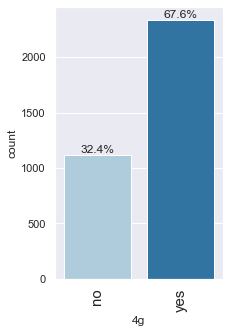

In [31]:
# Let's generate a bar plot for the 4g flag
labeled_barplot(df, '4g', show_percent=True)

#### Observation
* About 67.6% of the devices come with 4g capability

#### `5g`

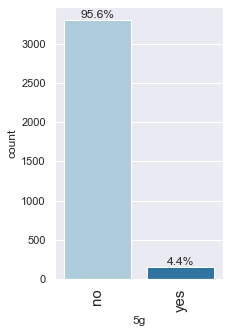

In [96]:
# Let's generate a bar plot for the 5g flag
labeled_barplot(df, '5g', show_percent=True)

#### Observation
* 95% of the devices do not have 5g indicating that this feature may not yet be very common. We will look for further pattern in terms of it's relationship between release year and price in our bi-variate analysis

#### `release_year`

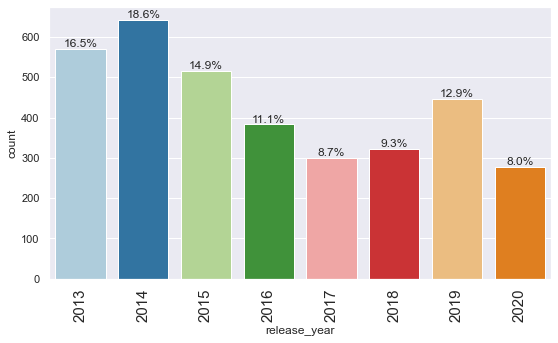

In [33]:
# Let's generate a bar plot for the release year
labeled_barplot(df, 'release_year', show_percent=True)

#### Observation
* We have more devices available with earlier release date in the datset

## Bivariate Analysis

#### Let's start with exploring the correlations between different variables

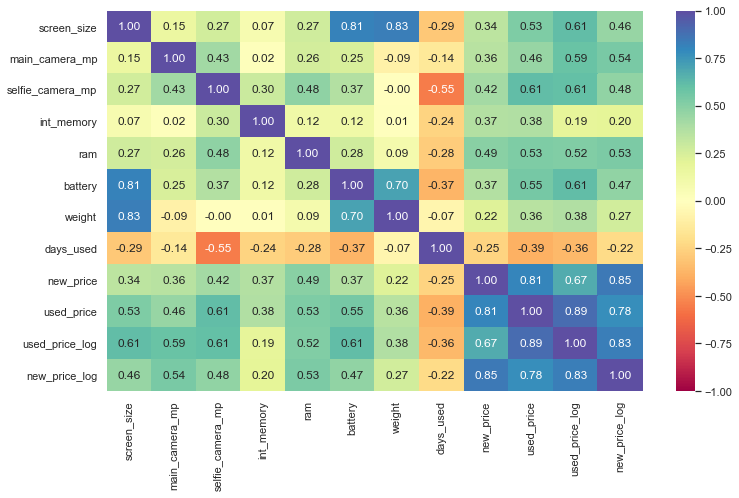

In [157]:
# We will drop the released year from our correlation matrix as it's temporal data
df_corr = df.drop('release_year',axis=1)


plt.figure(figsize=(12, 7))
sns.heatmap(
    df_corr.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

#### Observation
* used_price and new_price are highly correlated. The higher the original price of the device was, the higher the resell value tend to be
* The next sets of highly correlated values are battery, weight and screen size. The bigger the device is, the heavier it will be. 
* The higher the battery power is, the heavier the device will be
* Bigger screen requires higher powered battery
* Both battery power and screen size has significant positive correlation with the used and new price
* Weight is positively correlated with price, however it's correlation with price is not as significant as screen size and battery. So we might consider dropping weight from our regression model
* Prices are highly correlated with camera mega pixels. The correlation between used price and mega pixels are higher than new price
* Higher ram mean higher power. High powered devices will sell for higher price. We can clearly see this relationship in the correlation matrix as the ram and price is highly positively correlated
* Days used is negatively correlated with price as the more wear and tear an item has, the less price it will sell for
* Internal memory is least correlated to the price compared to rest of the variables

#### Let's explore the distribution of price for the used devices accross different brands

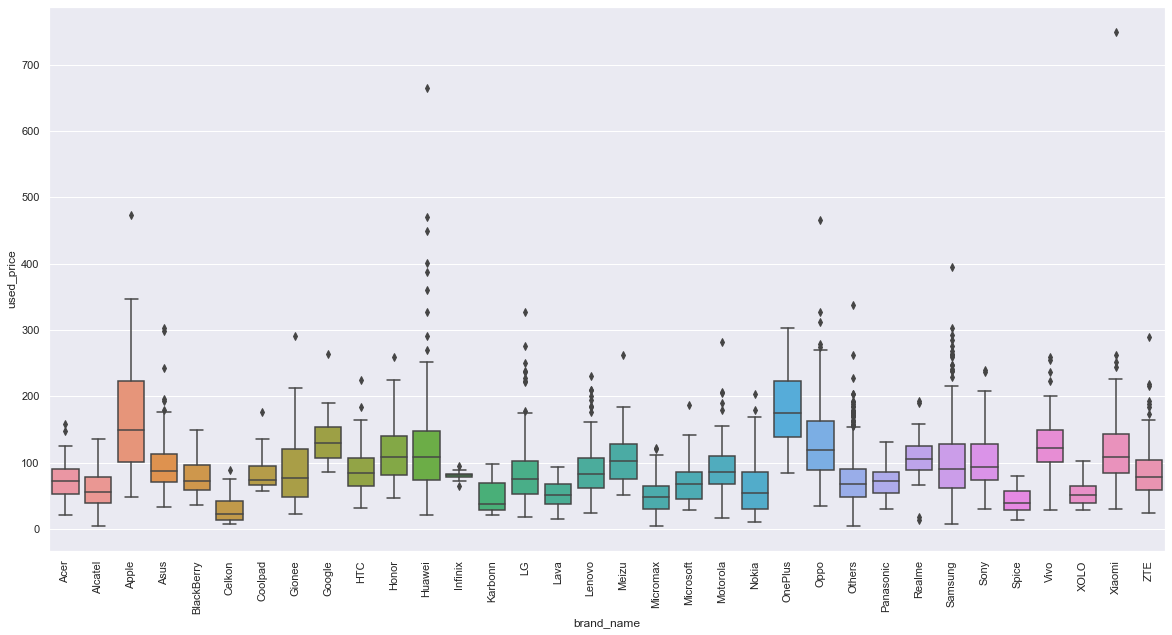

In [42]:
# Generate a boxplot for the used_prices accross different brands
plt.figure(figsize=(20, 10))
sns.boxplot(data=df, x="brand_name", y="used_price")
plt.xticks(rotation=90)
plt.show()

#### Observation
* On average, One plus has the highest resell value followed by apple devices. We see Huwaei brand with some high max value for used_prices. 
* Samsung, another popular brand has lower mean, but some high outliers on the right

Let's check out the means for used_price and new_price for all brands side by side to see which brands come out at the top

In [119]:
# Let's find the devices with highest mean price 
df_price = df.groupby('brand_name')["used_price"].mean().to_frame()
df_price_new = df.groupby('brand_name')["new_price"].mean().to_frame()
df_price = df_price.merge(df_price_new,how='inner',on='brand_name')
df_price['percent_reduction'] = ((df_price['new_price'] - df_price['used_price']) / df_price['new_price'])*100
df_price.sort_values('used_price',ascending=False)

,used_price,new_price,percent_reduction
brand_name,,,
OnePlus,183.223636,558.230909,67.177805
Apple,172.015385,623.162564,72.396387
Google,138.597333,474.716667,70.804199
Oppo,130.043566,341.912326,61.965815
Vivo,126.787094,320.268291,60.412224
Xiaomi,122.796288,259.326364,52.647974
Huawei,122.436813,329.984143,62.896153
Honor,114.489138,236.857845,51.663354
Meizu,108.286935,269.569194,59.829633


#### Observation
* OnePlus,Apple,Google,Oppo,Vivo,Xiaomi,Huawei devices come out at the top with higher value for both used and new price
* Lower priced devices has lower percent reduction, giving customers less incentive to buy

#### There are many factors that make a phone/tablet desirable for an end user. A high end camera photography enthuisiasts, long battery life for power users, bigger screen for entertainment lovers and sometimes even popularity of a brand all can come into play for deman. Let's explore the distribution of brands for some of these important features

#### The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?

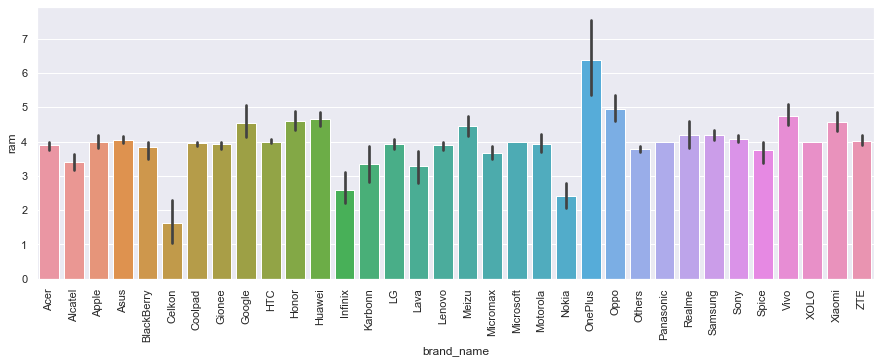

In [93]:
# Generate a barplot for the ram accross different brands
plt.figure(figsize=(15, 5))
sns.barplot(data=df, x="brand_name", y="ram")
plt.xticks(rotation=90)
# Let's find the devices with highest mean price 
df_price = df.groupby('brand_name')["used_price"].mean().to_frame()
df_price_new = df.groupby('brand_name')["new_price"].mean().to_frame()
df_price = df_price.merge(df_price_new,how='inner',on='brand_name')
df_price.sort_values('used_price',ascending=False)plt.show()

In [114]:
# Let's find the devices that offer highest ram in their devices 
df_ram = df.groupby('brand_name')['ram'].mean().to_frame().rename(columns={'ram':'ram_mean'})
df_ram_max = df.groupby('brand_name')['ram'].max().to_frame().rename(columns={'ram':'ram_max'})
df_ram = df_ram.merge(df_ram_max,how='inner',on='brand_name')
df_ram.sort_values('ram_mean',ascending=False)

,ram_mean,ram_max
brand_name,,
OnePlus,6.363636,12.0
Oppo,4.961240,12.0
Vivo,4.756410,8.0
Huawei,4.655378,12.0
Honor,4.603448,8.0
Xiaomi,4.583333,12.0
Google,4.533333,6.0
Meizu,4.451613,8.0
Samsung,4.199413,12.0


#### Observation
* One plus, most popular brand based on highest mean used_price also offers phones with higher spec as it has higher ram than the rest of the devices. 
* Some of the other players offering higher ram are Oppo, Vivo, Xiaomi and Huwaei. 
* There are also some brands that offers both high end and budget devices such as sumsang. They have lower mean ram, but offers one of the highest ram out of all the dvices

#### A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?

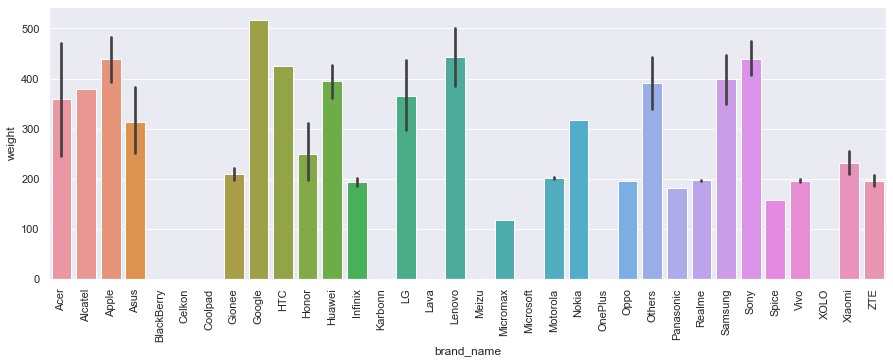

In [161]:
#create a data frame for devices with high powered battery only
df_high_battery = df[df['battery'] > 4500 ]
# Generate a barplot for the weight accross different brands
plt.figure(figsize=(15, 5))
sns.barplot(data=df_high_battery, x="brand_name", y="weight")
plt.xticks(rotation=90)
plt.show()

#### Observation
Google's devices are heaviest followed by lenovo and apple

#### Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?

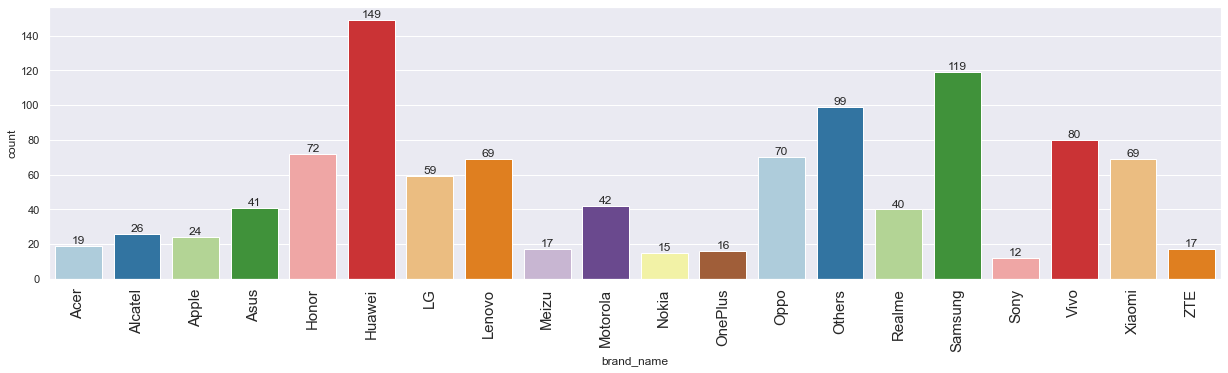

In [162]:
#create a data frame for devices with bigger screen
df_large_screen = df[df['screen_size'] > 6*2.54 ]  #The screen size in the datset is in cm
df_large_screen
# Generate a barplot for the weight accross different brands
labeled_barplot(df_large_screen, 'brand_name', show_percent=False, top_n = 20)

#### Observation
* The brand with highest number of devices with large screen is Huwaei, followed by Samsung and Vivo
* Though google's devices are heaviest, they do not necessarily have big screen. For some devices, most of the weight is coming from large battery and not necessarily larger screen only

#### Budget devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of budget devices offering greater than 8MP selfie cameras across brands?

We will define budget phones as phones/tablets with used_price lower than the mean price

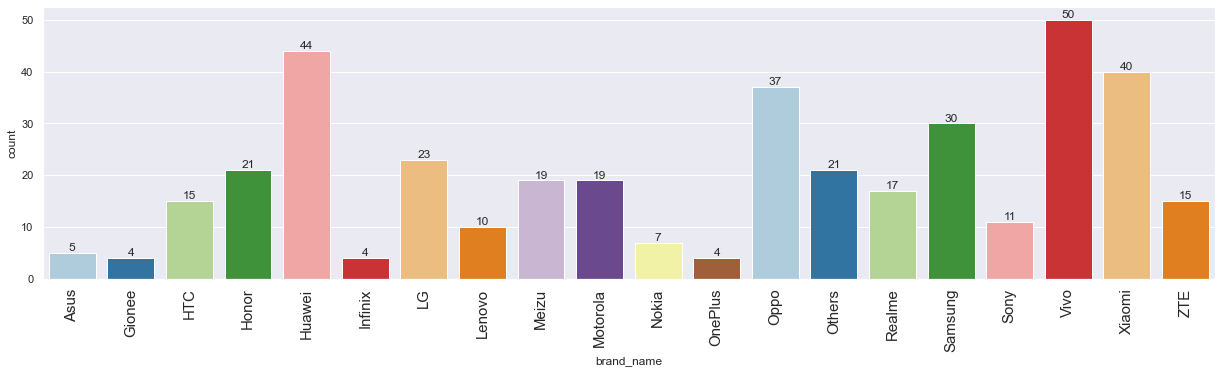

In [163]:
#create a data frame for devices with high end selfie camera
df_selfie_camera = df[df['selfie_camera_mp'] > 8 ]

# Create a data frame with budget devices
df_budget = df_selfie_camera[df_selfie_camera['used_price'] < df_selfie_camera['used_price'].mean()]

# Generate a barplot for the weight accross different brands
labeled_barplot(df_budget, 'brand_name', show_percent=False, top_n = 20)

#### Observation 
Vivo, Huwaei, Xiaomi, Oppo and Samsung all offer some good selfie camera in their budget phones.
Vivo has the highest number of phones with high end selfie camera available followed by Huwaei and Xiaomi. 

#### Summary of EDA
* used_price had significant positive correlation with most of the variables in the dataset with highest correlation number of .81 with new_price. 
* used_price has lowest correlation with int_memory with a value of .19. int_memory doesn't have too high of a correlation with any of the other variables
* used_price has negative correlation of -.36 with days_used
* In our correlation matrix, we found very high correlation between a few other variables. battery, screen size and weight are highly positively correlated. 
* battery, screen size and weight are also positively correlated with price indicating a demand for bigger devices
* We found which are the most popular brands tend to offer higher spec compared to others
* Some of the key players in terms of high price and spec are **OnePlus,Apple,Google,Oppo,Vivo,Xiaomi,Huawei**
* Higher end brands also greater percent reduction in value for their used price compared to new price making them more attractive to customers
* We know **Samsung**, one of the most popular brands out there offers wide range of phones/tablets, both budget and flagship models. We see it reflected in this data as Samsung devices has lower mean but still offers some of the highest max spec

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

### Missing value treatment

In [293]:
# Let's print the number of missing values accross all columns
df.isnull().sum().sort_values(ascending=False)

main_camera_mp      179
weight                7
battery               6
ram                   4
int_memory            4
selfie_camera_mp      2
release_year          0
used_price_log        0
used_price            0
new_price             0
days_used             0
brand_name            0
os                    0
5g                    0
4g                    0
screen_size           0
new_price_log         0
dtype: int64

In [294]:
# Counting the number of missing values per row
df.isnull().sum(axis=1).value_counts()

0    3253
1     200
2       1
dtype: int64

#### Observation
* The dataset do not have a large number of missing values. 

* A total of 201 rows have missing values, out of which only one row has missing values in more than 1 column. So we will have to treat each missing value spearately. We would like to impute the missing value with something sensible as we do not want to loose the data contained in rest of the columns for these 201 rows 

* The columns with missing values are main_camera_mp, weight, battery, ram, int_memory and selfie_camera_mp. These are all different camera feautures. The features released for a brand in the same year will have a higher chance of being the same 

* As all the missing value columns are camera features, <b>we will use median to impute the nulls</b> instead of mean. 

* We will start with finding the number of missing main_camera_mp values accorss the release years for different brands as it has the most number of missing values. 

Let's define a function that will print out the number of missing valueas as well as total number of records per brand per year for specified columns. This way we will be able to decide if we have enough data for that brand and year for the imputation. 

In [295]:
# Count number of missing values for a specified column accros brand and years
def missing_value_comparison(dataframe,column):
    """
    This function takes in a dataframe and a column name
    and prints out the number of missing values for the column as well as number of total records
    by brand_name and release_year columns.
    """
    #Find the number of nulls per brand per release year. 
    column_null = df[[column,'brand_name','release_year']][df[column].isnull()].groupby(['brand_name','release_year']).size().to_frame(name=None).reset_index()
    column_null.columns = ['brand_name', 'release_year','Total Null records']

    #Find the total number of records per brand per release year
    column_total = df[[column,'brand_name','release_year']].groupby(['brand_name','release_year']).size().to_frame(name=None).reset_index()
    column_total.columns = ['brand_name', 'release_year','Total records']

    # Merge the two dataframes to compare the number of nulls against total number of records
    column_by_brand_year = column_null.merge(column_total, on=['brand_name','release_year'], how='inner')
    print(column_by_brand_year[column_by_brand_year['Total Null records'] >= 1])
    

#### `main_camera_mp` 
main_camera_mp has the most number of missing values. 
For the rows missing the main_camera_mp value, we would like to further explore to see if there is any obvious pattern to it. It will help us decide on the best ways to replace the nulls. 

Let's start with finding the number of missing main_camera_mp values accorss the release years for different brands. 

In [175]:
# Count number of missing main_camera_mp value accros brand and years
missing_value_comparison(df,'main_camera_mp')

     brand_name  release_year  Total Null records  Total records
14         Asus          2019                   4              4
17   BlackBerry          2018                   4              4
25      Coolpad          2018                   1              1
26      Coolpad          2019                   1              1
27      Coolpad          2020                   1              1
50      Infinix          2019                   4              4
51      Infinix          2020                   6              6
63         Lava          2020                   2              2
70        Meizu          2019                  11             11
71        Meizu          2020                   4              4
83     Motorola          2020                  18             18
88      OnePlus          2017                   2              2
89      OnePlus          2018                   3              3
90      OnePlus          2019                   8              8
91      OnePlus          

#### Observation

For each brand, the main_camera_mp value is missing for every single record for certain release years. So we can not fill in the nulls using the mean/median of the brand for that specific year. 

Generally, every year, the brands try to up their features compared to previous year. However, different brands tend to release devices with similar features in the same release year. 

Also, as the mp value is a camera feature and there can only be certain values for mega pixels, it would make more sense to fill in the missing data with median instead of mean value. 

Therefore we will <b>fill in the missing main_camera_mp values with median for each release_year accross the entire dataset.</b> 

In [303]:
# Fill in the missing main_camera_mp with the median main_camera_mp for each release_year.
df['main_camera_mp'] = df.groupby('release_year')['main_camera_mp'].transform(lambda x: x.fillna(x.median()))

#df[(df['brand_name'] == 'Asus') & (df['release_year'] == 2019)]
#df.head(10)

In [310]:
# Let's check the number of missing values again to make sure we no longer have any missing main_camera_mp
df.isnull().sum().sort_values(ascending=False)

weight              7
battery             6
ram                 4
int_memory          4
selfie_camera_mp    2
used_price_log      0
used_price          0
new_price           0
days_used           0
release_year        0
brand_name          0
os                  0
main_camera_mp      0
5g                  0
4g                  0
screen_size         0
new_price_log       0
dtype: int64

In [313]:
# Let's do a quick sanity check of the data to make sure main_camera_mp field looks good
df.tail()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price,used_price_log,new_price_log
3449,Asus,Android,15.34,yes,no,12.2,8.0,64.0,6.0,5000.0,190.0,2019,232,654.50,89.33,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,518.81,154.12,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,92.65,78.05,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,101.92,77.46,4.349762,4.624188
3453,Alcatel,Android,12.83,yes,no,13.0,5.0,16.0,2.0,4000.0,168.0,2020,176,72.24,62.31,4.132122,4.279994


#### `weight` `battery` `int_memory` `ram` `selfie_camera_mp`

We are now left with 5 columns with missing values. weight, battery, int_memory,ram and selfie_camera_mp.
As the maximum number of records missing for these columns are 7, we will run our comparsion at the same time for these 5 columns. 

We will run a similar check for rest of the columns with missing values as our first preference will be to replace the missing weight with the median for each brand accross the release year.

First let's start with finding the number of missing values accorss the release years for different brands for all 5 columns. 

In [314]:
# Create a list with rest of the columns names that has missing values
missing_columns = ['weight','battery','int_memory','ram','selfie_camera_mp']

#Run the function missing_value_comparison for rest of the columns and print the result
for col in missing_columns:
    print('\033[1m' + f'Missing value comparison by brand name and release year for {col}' + '\033[0m')
    missing_value_comparison(df,col)
    print(' ')

Missing value comparison by brand name and release year for weight
   brand_name  release_year  Total Null records  Total records
31       XOLO          2015                   7              7
 
Missing value comparison by brand name and release year for battery
   brand_name  release_year  Total Null records  Total records
52      Meizu          2014                   3              3
57  Microsoft          2013                   1              1
65      Nokia          2016                   2              2
 
Missing value comparison by brand name and release year for int_memory
   brand_name  release_year  Total Null records  Total records
63      Nokia          2013                   1             22
64      Nokia          2015                   1              6
65      Nokia          2019                   2             18
 
Missing value comparison by brand name and release year for ram
   brand_name  release_year  Total Null records  Total records
63      Nokia          2013    

#### Observation
* weight and battery columns are missing values for all the records from the same brand only, for the same year. So we can not use the median by brand_name and release_year to fill in the nulls.
* int_memory and ram  has values in other rows for the same brand and year. So we should be able to impute the median per brand per release year for these two columns
* selfie_camera_mp also has missing value for all rows for the same brand for the same year. So we can not impute the nulls with median per brand per release year

#### Impute `weight` `battery` 

From our EDA earlier we know weight, battery and screen size are highly correlated. Let's do a quick scan of the corresponding screen size for both missing weight and battery values.

In [315]:
# Print the rows where the weight column is nan
df[df['weight'].isnull()]

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price,used_price_log,new_price_log
3002,XOLO,Android,12.70,yes,no,13.0,5.0,32.0,4.0,2400.0,NaN,2015,576,138.44,64.45,4.165890,4.930437
3003,XOLO,Android,12.83,yes,no,8.0,5.0,16.0,4.0,3200.0,NaN,2015,800,179.33,72.39,4.282068,5.189228
3004,XOLO,Android,12.70,no,no,8.0,2.0,32.0,4.0,2100.0,NaN,2015,878,59.21,48.41,3.879706,4.081090
3005,XOLO,Android,10.29,no,no,5.0,0.3,32.0,4.0,1800.0,NaN,2015,1036,81.13,45.78,3.823847,4.396053
3006,XOLO,Android,12.70,no,no,5.0,0.3,16.0,4.0,2500.0,NaN,2015,679,77.26,46.39,3.837084,4.347176
3007,XOLO,Windows,12.70,no,no,8.0,2.0,32.0,4.0,2200.0,NaN,2015,838,120.51,40.74,3.707210,4.791733
3008,XOLO,Android,12.70,no,no,8.0,5.0,32.0,4.0,2500.0,NaN,2015,1045,119.75,65.67,4.184642,4.785406


In [316]:
# Print the rows where the battery column is nan
df[df['battery'].isnull()]

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price,used_price_log,new_price_log
1829,Meizu,Android,12.83,yes,no,13.0,5.0,16.00,4.00,NaN,145.0,2014,986,129.49,65.23,4.177919,4.863604
1831,Meizu,Android,12.83,yes,no,20.7,5.0,16.00,4.00,NaN,158.0,2014,1043,399.67,131.48,4.878855,5.990639
1832,Meizu,Android,13.61,yes,no,20.7,2.0,16.00,4.00,NaN,147.0,2014,1007,339.04,114.70,4.742320,5.826118
1962,Microsoft,Windows,25.55,no,no,5.0,3.5,32.00,4.00,NaN,675.9,2013,931,331.21,186.90,5.230574,5.802753
2058,Nokia,Others,5.18,no,no,0.3,0.0,0.06,0.02,NaN,81.0,2016,815,29.21,15.16,2.718660,3.374511
2059,Nokia,Others,5.18,no,no,0.3,0.0,0.06,NaN,NaN,82.6,2016,1023,38.78,15.88,2.765060,3.657905


And we do see a positive correlation in screen size, weight and battery in the records with missing weight or battery.

So we will fill in the nulls with a median per release year per screen size accross all brands.

In [323]:
# Fill in the missing weight with the median for each release_year.
df['weight'] = df.groupby(['release_year','screen_size'])['weight'].transform(lambda x: x.fillna(x.median()))

# Fill in the missing battery with the median for each release_year.
df['battery'] = df.groupby(['release_year'])['battery'].transform(lambda x: x.fillna(x.median()))

#df[(df['brand_name'] == 'XOLO') & (df['release_year'] == 2015)]
#df.head(10)

In [324]:
# Let's check the number of missing values again to make sure we no longer have any missing main_camera_mp and weight
df.isnull().sum().sort_values(ascending=False)

ram                 4
int_memory          4
selfie_camera_mp    2
weight              0
used_price_log      0
used_price          0
new_price           0
days_used           0
release_year        0
brand_name          0
battery             0
os                  0
main_camera_mp      0
5g                  0
4g                  0
screen_size         0
new_price_log       0
dtype: int64

#### `int_memory` `ram` 

For int_memory and ram, we will impute the missing value with median for the brand_name by year

In [325]:
# Fill in the missing int_memory with the median for each release_year.
df['int_memory'] = df.groupby(['brand_name','release_year'])['int_memory'].transform(lambda x: x.fillna(x.median()))

# Fill in the missing ram with the median for each release_year.
df['ram'] = df.groupby(['brand_name','release_year'])['ram'].transform(lambda x: x.fillna(x.median()))

#df[(df['brand_name'] == 'Asus') & (df['release_year'] == 2019)]
#df.head(10)

#### `selfie_camera_mp`

For selfie_camera_mp, we will impute the missing value with median for each release_year accross the entire dataset, same as main_camera_mp

In [326]:
# Fill in the missing selfie_camera_mp with the median for each release_year.
df['selfie_camera_mp'] = df.groupby("release_year")['selfie_camera_mp'].transform(lambda x: x.fillna(x.median()))

Let's do a final check to see if we have any missing value remaining in the dataset

In [327]:
# Let's check the number of missing values again to make sure we no longer have any missing main_camera_mp and weight
df.isnull().sum().sort_values(ascending=False)

brand_name          0
battery             0
used_price_log      0
used_price          0
new_price           0
days_used           0
release_year        0
weight              0
ram                 0
os                  0
int_memory          0
selfie_camera_mp    0
main_camera_mp      0
5g                  0
4g                  0
screen_size         0
new_price_log       0
dtype: int64

We can confirm that the dataset no longer has missing values.

### Feature Engineering

In [328]:
# Let's take a quick look at all the columns available in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   brand_name        3454 non-null   category
 1   os                3454 non-null   category
 2   screen_size       3454 non-null   float64 
 3   4g                3454 non-null   category
 4   5g                3454 non-null   category
 5   main_camera_mp    3454 non-null   float64 
 6   selfie_camera_mp  3454 non-null   float64 
 7   int_memory        3454 non-null   float64 
 8   ram               3454 non-null   float64 
 9   battery           3454 non-null   float64 
 10  weight            3454 non-null   float64 
 11  release_year      3454 non-null   int64   
 12  days_used         3454 non-null   int64   
 13  new_price         3454 non-null   float64 
 14  used_price        3454 non-null   float64 
 15  used_price_log    3454 non-null   float64 
 16  new_price_log     3454 n

#### brand_name
* Brand names play an important role in people's decision in which device to purchase. We would like to see how relevant brand popularity is through this model. We will split the data into three categories based on cell phone brands. 
* First lets check the brands we have available in the dataset

In [329]:
df['brand_name'].value_counts().sort_values(ascending = False)

Others        502
Samsung       341
Huawei        251
LG            201
Lenovo        171
ZTE           140
Xiaomi        132
Oppo          129
Asus          122
Alcatel       121
Vivo          117
Micromax      117
Honor         116
HTC           110
Nokia         106
Motorola      106
Sony           86
Meizu          62
Gionee         56
Acer           51
XOLO           49
Panasonic      47
Realme         41
Apple          39
Lava           36
Celkon         33
Spice          30
Karbonn        29
Microsoft      22
OnePlus        22
Coolpad        22
BlackBerry     22
Google         15
Infinix        10
Name: brand_name, dtype: int64

We will split the data into 3 categories: top,middle,bottom. 
We will decide on which brands to put in which category based on our familiarity with the market as well as based on our analysis during EDA
1. brand_popularity_top: OnePlus,Apple,Google,Oppo,Vivo,Xiaomi,Huawei. We will also add Samsung as we know it's one of the most popular brand. And we saw Samsung having one the most high end spec devices
2. brand_popularity_middle: Sony,Nokia,Motorola,HTC,Microsoft,Panasonic,Acer,Asus,Lenovo,LG,BlackBerry. These are some of the more common brand names in the industry 
3. brand_popularity_bottom: All other brands

In [330]:
#Let's create a new column brand_tier
def brand_category(brand_value):
    if brand_value in ('OnePlus','Apple','Google','Oppo','Vivo','Xiaomi','Huawei','Samsung'):
        return 'top'
    elif brand_value in ('Sony','Nokia','Motorola','HTC','Microsoft','Panasonic','Acer','Asus','Lenovo','LG','BlackBerry'):
        return 'middle'
    else: 
        return 'bottom'
        
df['brand_popularity'] = df['brand_name'].map(lambda x: brand_category(x))

In [331]:
#Check the new columns
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price,used_price_log,new_price_log,brand_popularity
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,111.62,74.26,4.307572,4.715100,bottom
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,249.39,174.53,5.162097,5.519018,bottom
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,359.47,165.85,5.111084,5.884631,bottom
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,278.93,169.93,5.135387,5.630961,bottom
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,140.87,80.64,4.389995,4.947837,bottom


### Outlier detection and treatment


During our Univariate analysis, we noticed that most of the variables have outliers. However, given the nature of the data, these outliers may not be incorrect values. All of the variables are different specs of devices and some of these brand do offer very high end or low end spec that may be starkly different from the rest.

Nevertheless, we would like to do a quick scan of all the variables that showed outliers.
use the IQR method to print out the columns and flag points for investigation if necessary. 

Let's start with defining a function. 

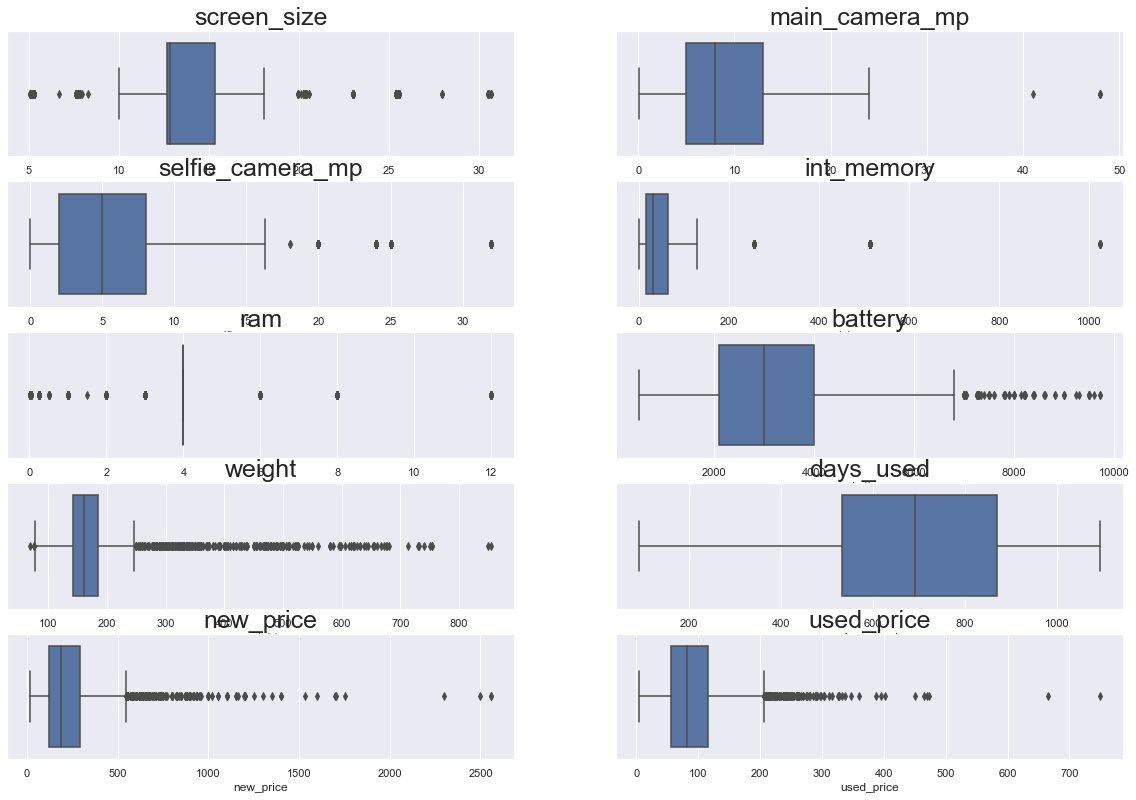

In [332]:
# Let's create a list of columns
continous_variab = df.select_dtypes(include=np.number).columns.tolist()
# dropping the following variables
continous_variab.remove('release_year')
continous_variab.remove('used_price_log')
continous_variab.remove('new_price_log')

plt.figure(figsize=(20, 55))

for i in range(len(continous_variab)):
    plt.subplot(20, 2, i + 1)
    ax = sns.boxplot(x=df[continous_variab[i]])
    plt.title(continous_variab[i],fontsize=25)

plt.show()

#### Observation
We see some of the continouse variables have outliers. Now given the nature of the dataset, most of these variables with outliers are different phone/tablet feature. 

For example, motorola has a mean ram of around 3. But it has a maximum ram of 12. This number is definitely accurate as a brand can offer high specs in some of their prodcuts. 

Base on our EDA, we can say this is true for all of our variables. Among other continouse variable that's not a phone/tablet feature however, days used do not have any outlier.

The only other two variables with outliers are new_price and used_price. Both have outliers on the right.

#### used_price

In [333]:
#Let's calculate IQR for used_price
Q1=df['used_price'].quantile(0.25)
Q3=df['used_price'].quantile(0.75)
IQR=Q3-Q1

#Let's find the used_price that falls far from the IQR where the brand is flagged as bottom as chance of those devices having high used_price value is less
df_within_iqr = df[~((df['used_price']<(Q1-1.5*IQR)) | (df['used_price']>(Q3+1.5*IQR)))]
#df['used_price'].max()
df[(df['used_price'] > df_within_iqr['used_price'].max()) & (df['brand_popularity'] == 'bottom')].sort_values('used_price',ascending=False)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price,used_price_log,new_price_log,brand_popularity
996,Others,Android,20.35,yes,no,8.0,24.0,256.0,4.0,3400.0,171.0,2019,354,899.41,337.21,5.820706,6.801739,bottom
1035,Gionee,Android,12.88,yes,no,13.0,8.0,128.0,4.0,7000.0,238.0,2016,656,1149.64,291.38,5.674628,7.047204,bottom
210,ZTE,Android,16.89,yes,no,48.0,16.0,128.0,8.0,5000.0,215.0,2019,336,819.57,289.47,5.668052,6.708780,bottom
137,Others,Android,16.43,yes,yes,8.0,20.0,128.0,6.0,4000.0,171.0,2019,317,900.87,262.49,5.570213,6.803361,bottom
3364,Meizu,Android,15.39,yes,yes,8.0,20.0,128.0,8.0,4500.0,219.0,2020,139,600.09,262.24,5.569260,6.397080,bottom
3334,Honor,Android,16.69,yes,yes,13.0,8.0,256.0,8.0,4000.0,190.0,2020,266,634.09,259.10,5.557214,6.452191,bottom
1140,Others,Windows,15.14,yes,no,16.0,8.0,64.0,4.0,4150.0,195.0,2016,711,699.46,227.66,5.427853,6.550309,bottom
1092,Honor,Android,15.34,yes,no,13.0,25.0,256.0,4.0,4000.0,180.0,2018,410,570.68,224.68,5.414677,6.346829,bottom
204,ZTE,Android,16.89,yes,yes,8.0,12.0,256.0,8.0,5100.0,215.0,2020,235,598.66,219.39,5.390851,6.394694,bottom
12,Honor,Android,16.69,yes,yes,13.0,16.0,128.0,8.0,4100.0,206.0,2019,537,499.68,217.73,5.383256,6.213968,bottom


Compared to their new_price, we do see a significant drop in the used_price for all the outliers in the least popular brands. We will keep these values without treating them as they do not seem to be a mistake and contain valuable information.

#### new_price

In [334]:
#Let's calculate IQR for new_price
Q1=df['new_price'].quantile(0.25)
Q3=df['new_price'].quantile(0.75)
IQR=Q3-Q1

#Let's find the used_price that falls far from the IQR where the brand is flagged as bottom as chance of those devices having high used_price value is less
df_within_iqr = df[~((df['new_price']<(Q1-1.5*IQR)) | (df['new_price']>(Q3+1.5*IQR)))]
#df['used_price'].max()
df[(df['new_price'] > df_within_iqr['new_price'].max()) & (df['brand_popularity'] == 'bottom')].sort_values('new_price',ascending=False)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price,used_price_log,new_price_log,brand_popularity
1035,Gionee,Android,12.88,yes,no,13.0,8.0,128.0,4.0,7000.0,238.0,2016,656,1149.64,291.38,5.674628,7.047204,bottom
137,Others,Android,16.43,yes,yes,8.0,20.0,128.0,6.0,4000.0,171.0,2019,317,900.87,262.49,5.570213,6.803361,bottom
356,Others,Android,16.43,yes,yes,8.0,20.0,128.0,6.0,4000.0,171.0,2019,486,900.58,110.13,4.701661,6.803039,bottom
930,Others,Android,12.75,yes,no,16.0,8.0,64.0,4.0,4500.0,250.0,2018,443,899.95,118.75,4.777020,6.802339,bottom
996,Others,Android,20.35,yes,no,8.0,24.0,256.0,4.0,3400.0,171.0,2019,354,899.41,337.21,5.820706,6.801739,bottom
2348,Others,Android,14.53,yes,no,12.0,8.0,64.0,4.0,4000.0,220.0,2018,630,850.34,204.40,5.320079,6.745636,bottom
210,ZTE,Android,16.89,yes,no,48.0,16.0,128.0,8.0,5000.0,215.0,2019,336,819.57,289.47,5.668052,6.708780,bottom
2349,Others,Android,12.88,yes,no,13.0,8.0,64.0,4.0,4000.0,197.0,2017,565,749.54,77.44,4.349503,6.619460,bottom
2668,Others,Android,10.16,yes,no,8.0,1.0,16.0,4.0,4800.0,290.0,2014,654,700.09,183.80,5.213848,6.551209,bottom
2667,Others,Android,12.70,yes,no,12.0,8.0,64.0,4.0,4900.0,335.0,2018,426,699.77,204.43,5.320226,6.550752,bottom


Scanning through all the ourliers for new price, we see that all the records we decided to examine, offers decent spec. For example, all of them have good selfie camera mp, which is not always common, specially in the phones released ealier in time. 

If we were to drop these records, or treat the values by replacing with median, we may loose usefull information. Hence we will leave new_price column as is. 

### Preparing data for modeling

* Our objective here is to predict the used device price using a model
* We will drop the columns we will not use for the modeling based on our EDA
* We will define the dependent and independent variables
* Lastly we will split the data into train and test sets to be able to evaluate the model that we build on the train data

In [374]:
#Create a copy of the dataset for the modeling
df_final = df.copy()

* We will drop the column year as it's temporal data. 
* Also we will drop the weight column as it is highly correlated with screen size and battery. The device's weight depends on the battery power and screen size. Also while buying a device, customers rarely consider the weight and rather evualuate comfort on how big the screen size is. 
* We would also drop brand_name as we will be using the newly engineered column brand_popularity
* As the data is more normalized when log transformed in applied to the used_price, we will keep used_price_log and drop used_price from the modeling

In [375]:
#Create a list of columns that needs to be dropped
drop_columns = ['weight','release_year','brand_name','used_price','new_price_log'] 

#Drop the columns in the list from df_final dataframe
for col in drop_columns:
    df_final.drop(col,inplace=True,axis = 1)
    print(f'Dropped {col}')

Dropped weight
Dropped release_year
Dropped brand_name
Dropped used_price
Dropped new_price_log


In [376]:
#Check the final dataframe one last time before splitting the data
df_final.head()

,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,days_used,new_price,used_price_log,brand_popularity
0,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,127,111.62,4.307572,bottom
1,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,325,249.39,5.162097,bottom
2,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,162,359.47,5.111084,bottom
3,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,345,278.93,5.135387,bottom
4,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,293,140.87,4.389995,bottom


In [377]:
# define dependent and independent variables
X = df_final.drop(["used_price_log"], axis=1)
y = df_final["used_price_log"]

In [379]:
# let's add the intercept to data
X = sm.add_constant(X)
X.head()

,const,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,days_used,new_price,brand_popularity
0,1.0,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,127,111.62,bottom
1,1.0,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,325,249.39,bottom
2,1.0,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,162,359.47,bottom
3,1.0,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,345,278.93,bottom
4,1.0,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,293,140.87,bottom


In [380]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

# to ensure all variables are of float type
X = X.astype(float)

X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,days_used,new_price,os_Others,os_Windows,os_iOS,4g_yes,5g_yes,brand_popularity_middle,brand_popularity_top
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,127.0,111.62,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,325.0,249.39,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,162.0,359.47,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,345.0,278.93,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,293.0,140.87,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [381]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [382]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


## EDA

- It is a good idea to explore the data once again after manipulating it.

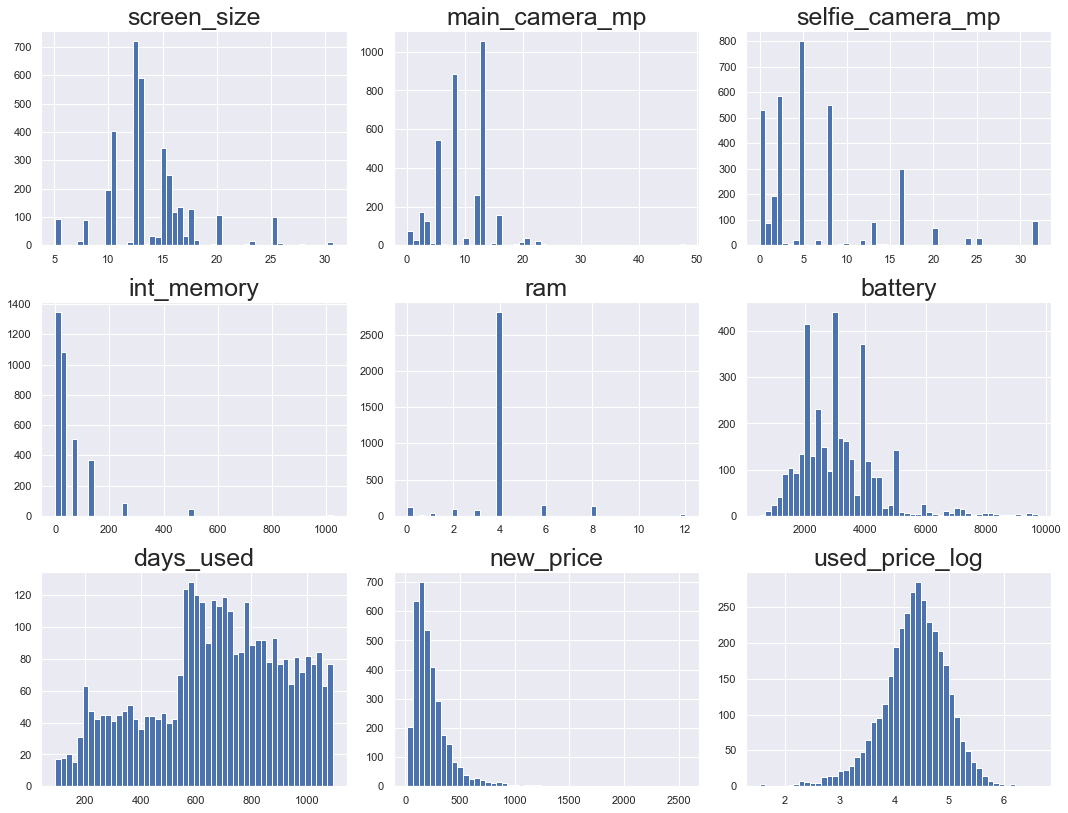

In [383]:
# Let's do a quick distribution for the final dataframe
# Let's create a list of columns
continous_variab = df_final.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 45))

for i in range(len(continous_variab)):
    plt.subplot(12, 3, i + 1)
    plt.hist(df_final[continous_variab[i]], bins=50)
    plt.tight_layout()
    plt.title(continous_variab[i], fontsize=25)

plt.show()

#### Observation
* Our distribution for used_price, which is our dependent variable is normal. We can proceed with linear regression with the independent variables not having normal distribution

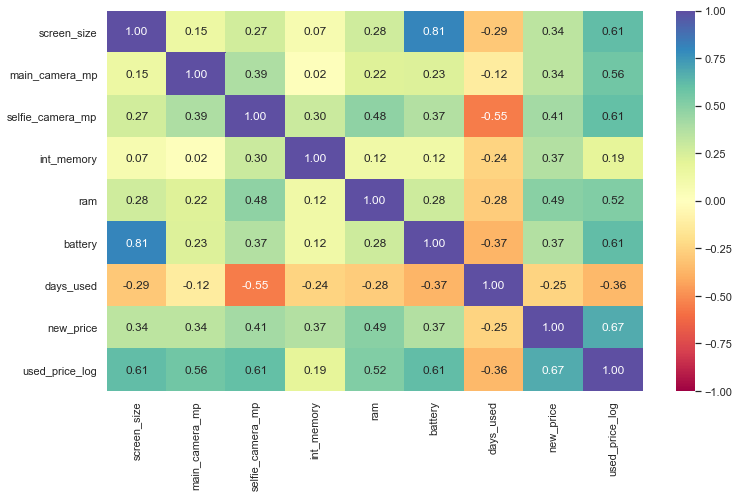

In [384]:
#Let's check for correlations between the columns 
plt.figure(figsize=(12, 7))
sns.heatmap(
    df_final[continous_variab].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

#### Observation
* We do see slight changes in the correlation matrix. Specially for the columns where we imputed missing values

## Building a Linear Regression model

In [385]:
# fitting a linear model
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     624.6
Date:                Sat, 11 Dec 2021   Prob (F-statistic):               0.00
Time:                        02:41:54   Log-Likelihood:                -207.15
No. Observations:                2417   AIC:                             446.3
Df Residuals:                    2401   BIC:                             539.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

## Model performance evaluation

In [386]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [387]:
# Checking model performance on train set
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, x_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.263624,0.199381,0.796012,0.794652,4.824653


In [388]:
# Checking model performance on test set
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, x_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.267048,0.199568,0.802277,0.799175,4.916425


**Observations**

* The train and test  𝑅2  are 0.796 and 0.795, indicating that the model explains 79.6% and 79.5% of the total variation in the train and test sets respectively. Also, both scores are comparable.

* RMSE values on the train and test sets are also comparable.

* This shows that the model is not overfitting.

* MAE indicates that our current model is able to predict used price within a mean error of 0.199568 on the test set.

* MAPE of 4.916425 on the test data means that we are able to predict within 4.9% of the used price.

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

We will be checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR MULTICOLLINEARITY

- We will test for multicollinearity using VIF.

    - If VIF is 1 then there is no correlation between the $k$th predictor and the remaining predictor variables.
    - If VIF exceeds 5 or is close to exceeding 5, we say there is moderate multicollinearity.
    - If VIF is 10 or exceeding 10, it shows signs of high multicollinearity.

In [393]:
# Let's define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [394]:
checking_vif(x_train)

,feature,VIF
0,const,58.850876
1,screen_size,3.281712
2,main_camera_mp,1.740573
3,selfie_camera_mp,2.241410
4,int_memory,1.403405
5,ram,2.112443
6,battery,3.383279
7,days_used,1.690794
8,new_price,2.019012
9,os_Others,1.387677


- None of the variables show moderate or high multicollinearity.

### Dropping high p-value variables

- We will drop the predictor variables having a p-value greater than 0.05 as they do not significantly impact the target variable.
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
    - Repeat the above two steps till there are no columns with p-value > 0.05.


In [396]:
# initial list of columns
cols = x_train.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = x_train[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'battery', 'days_used', 'new_price', 'os_Others', '4g_yes', 'brand_popularity_middle', 'brand_popularity_top']


In [397]:
x_train2 = x_train[selected_features]
x_test2 = x_test[selected_features]

In [398]:
olsmodel2 = sm.OLS(y_train, x_train2).fit()
print(olsmodel2.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     851.6
Date:                Sat, 11 Dec 2021   Prob (F-statistic):               0.00
Time:                        02:46:34   Log-Likelihood:                -208.97
No. Observations:                2417   AIC:                             441.9
Df Residuals:                    2405   BIC:                             511.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

### TEST FOR LINEARITY AND INDEPENDENCE

- We will test for linearity and independence by making a plot of fitted values vs residuals and checking for patterns.
- If there is no pattern, then we say the model is linear and residuals are independent.
- Otherwise, the model is showing signs of non-linearity and residuals are not independent.

In [400]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmodel2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmodel2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.831235,0.256253
1525,4.448399,4.586064,-0.137665
1128,4.315353,4.234098,0.081254
3003,4.282068,4.220948,0.061120
2907,4.456438,4.516491,-0.060053


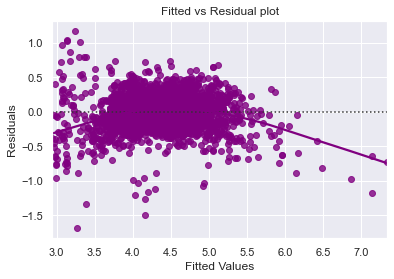

In [401]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

**Observations**

- We see no pattern in the plot above.
- Hence, the assumptions of linearity and independence are satisfied.

### TEST FOR NORMALITY

- We will test for normality by checking the distribution of residuals, by checking the Q-Q plot of residuals, and by using the Shapiro-Wilk test.
- If the residuals follow a normal distribution, they will make a straight line plot, otherwise not.
- If the p-value of the Shapiro-Wilk test is greater than 0.05, we can say the residuals are normally distributed.

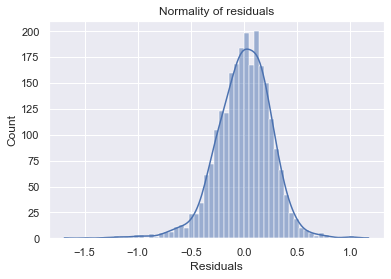

In [402]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

**Observations**

- The histogram of residuals almost has a bell shape structure.
- Let's check the Q-Q plot.

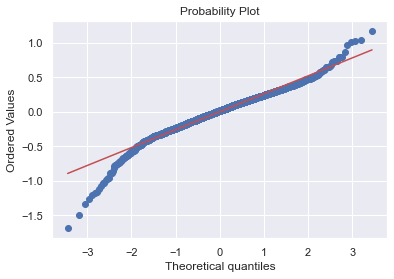

In [403]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

**Observations**

- The residuals almost follow a straight line.
- Let's check the results of the Shapiro-Wilk test.

In [404]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.969508707523346, pvalue=2.9801854859058435e-22)

**Observations**

- The p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.
- However from our plot above we see that there is no shape. So, the assumption is satisfied.

### TEST FOR HOMOSCEDASTICITY

- We will test for homoscedasticity by using the goldfeldquandt test.
- If we get a p-value greater than 0.05, we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.

In [407]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train2)
lzip(name, test)

[('F statistic', 1.038343165232193), ('p-value', 0.25764892470074935)]

**Observations**

- Since p-value > 0.05, the residuals are homoscedastic.
- So, the assumption is satisfied.

**All the assumptions of linear regression are satisfied. Let's rebuild our final model, check its performance, and draw inferences from it.**

## Final Model Summary

In [408]:
olsmodel_final = sm.OLS(y_train, x_train2).fit()
print(olsmodel_final.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     851.6
Date:                Sat, 11 Dec 2021   Prob (F-statistic):               0.00
Time:                        02:50:04   Log-Likelihood:                -208.97
No. Observations:                2417   AIC:                             441.9
Df Residuals:                    2405   BIC:                             511.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

## Actionable Insights and Recommendations

- A unit increase in screen_size increases the used price by 0.0523 units, all other variables held constant.
- A unit increase in main_camera_mp increases the used price by 0.0290 units, all other variables held constant.
- A unit increase in selfie_camera_mp increases the used price by 0.0177 units, all other variables held constant.
- A unit increase in ram increases the used price by 0.0347 units, all other variables held constant.
- A unit increase in battery increases the used price by 1.505e-05 units, all other variables held constant.
- A unit increase in days_used decreases the used price by 7.087e-05 units, all other variables held constant.
- A unit increase in new_price increases the used price by 0.0009 units, all other variables held constant.
- A unit increase in 4g_yes increases the used price by 0.1023 units, all other variables held constant.
- A unit increase in brand_popularity_middle increases the used price by 0.0469 units, all other variables held constant.
- A unit increase in brand_popularity_top increases the used price by 0.0385 units, all other variables held constant.



* Screen size and ram seems to have the most influence on the price
* Customers are more willing to pay for bigger and more powerful devices
* 4g capability is very important and increases the price
* The older the device is, the less used price it will have. But the effect isn't as significant
* Mid range phones are more popular and has higher used price
* Customers value main camera mp more than selfie camera
